In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.7f' % x)
# set the options to see all columns, rows
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_info_columns', 1001)
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import seaborn as sns
%matplotlib inline
plt.rc('ytick',labelsize=15)
# To use 한글 font in graphs
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False
# 그래프에서 음수값이 나올 때, 깨지는 현상 방지
plt.rc('axes', unicode_minus = False)

In [114]:
data_raw1 = pd.read_csv('./datas/train/data_proc1.csv')
data_raw2 = pd.read_csv('./datas/train/data_proc2.csv')
data_raw3 = pd.read_csv('./datas/train/data_proc3.csv')
data_raw4 = pd.read_csv('./datas/train/data_proc4.csv')
data_raw_ = pd.concat([data_raw1,data_raw2,data_raw3,data_raw4,], )

In [2]:
data_raw =pd.read_csv('./datas//train/data_without_outlier.csv')

In [160]:
data = data_raw_.copy()

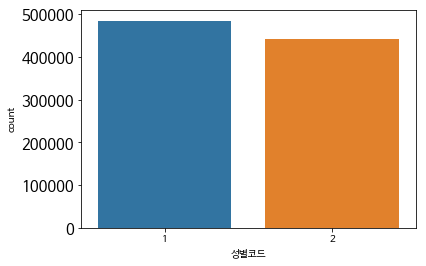

In [161]:
sns.countplot(data['성별코드'])

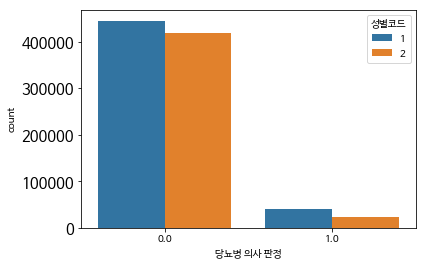

In [162]:
sns.countplot(data['당뇨병 의사 판정'],hue=data['성별코드'])

In [4]:
data.head()

가입자일련번호  성별코드  연령대코드(5세단위)  시도코드   신장(5Cm단위)   체중(5Kg단위)       허리둘레     시력(좌)     시력(우)     청력(좌)     청력(우)       수축기혈압      이완기혈압  식전혈당(공복혈당)      총콜레스테롤   트리글리세라이드   HDL콜레스테롤    LDL콜레스테롤        혈색소       요단백   혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT      감마지티피      흡연상태  구강검진 수검여부  당뇨병 의사 판정  고혈압 의사 판정  간기능 이상여부   알콜성간염여부
0   201061     2           17    45 150.0000000 135.0000000 51.0000000 0.5000000 0.5000000 1.0000000 1.0000000 110.0000000 65.0000000 155.0000000 101.0000000 81.0000000 54.0000000  30.0000000 11.3000000 1.0000000 0.6000000  21.0000000  18.0000000 24.0000000 1.0000000          0  1.0000000  0.0000000 0.0000000 0.0000000
1   586237     2           12    41 145.0000000  35.0000000 51.0000000 1.5000000 0.7000000 1.0000000 1.0000000  94.0000000 64.0000000  89.0000000 188.0000000 71.0000000 66.0000000 108.0000000 11.5000000 1.0000000 0.8000000  15.0000000  14.0000000 18.0000000 3.0000000          0  0.0000000  0.0000000 0.0000000 0.0000000
2   922457     2            9    11 150.0000000  35.0000000 51.0000000 1.2000000 1.0000000 1.0000000 1.0000000 110.0000000 70.0000000  94.0000000 211.0000000 87.0000000 87.0000000 107.0000000 13.3000000 1.0000000 0.7000000  18.0000000  10.0000000 20.0000000 1.0000000          1  0.0000000  0.0000000 0.0000000 0.0000000
3   982201     2           10    11 150.0000000  35.0000000 52.0000000 1.2000000 1.2000000 1.0000000 1.0000000  95.0000000 62.0000000  74.0000000 165.0000000 53.0000000 80.0000000  74.0000000 13.2000000 1.0000000 0.7000000  26.0000000  23.0000000 21.0000000 1.0000000          1  0.0000000  0.0000000 0.0000000 0.0000000
4   750333     2            5    41 160.0000000  40.0000000 52.0000000 1.0000000 1.0000000 1.0000000 1.0000000  90.0000000 60.0000000  90.0000000 185.0000000 46.0000000 71.0000000 105.0000000 13.6000000 1.0000000 0.7000000  34.0000000  34.0000000 24.0000000 1.0000000          1  0.0000000  0.0000000 0.0000000 0.0000000

In [5]:
data.isnull().sum().sum()

0

In [6]:
data['당뇨병 의사 판정'].value_counts()

0.0000000    863061
1.0000000     62182
Name: 당뇨병 의사 판정, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925243 entries, 0 to 925242
Data columns (total 30 columns):
가입자일련번호        925243 non-null int64
성별코드           925243 non-null int64
연령대코드(5세단위)    925243 non-null int64
시도코드           925243 non-null int64
신장(5Cm단위)      925243 non-null float64
체중(5Kg단위)      925243 non-null float64
허리둘레           925243 non-null float64
시력(좌)          925243 non-null float64
시력(우)          925243 non-null float64
청력(좌)          925243 non-null float64
청력(우)          925243 non-null float64
수축기혈압          925243 non-null float64
이완기혈압          925243 non-null float64
식전혈당(공복혈당)     925243 non-null float64
총콜레스테롤         925243 non-null float64
트리글리세라이드       925243 non-null float64
HDL콜레스테롤       925243 non-null float64
LDL콜레스테롤       925243 non-null float64
혈색소            925243 non-null float64
요단백            925243 non-null float64
혈청크레아티닌        925243 non-null float64
(혈청지오티)AST     925243 non-null float64
(혈청지오티)ALT     925243 non-null float64


In [40]:
cate_cols_list = []
nume_cols_list = []
for i in data.columns.tolist():
    if data[i].nunique()< 20:
        cate_cols_list.append(i)
    else :
        nume_cols_list.append(i)


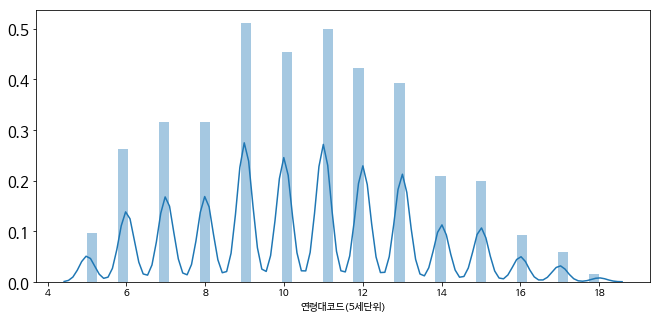

In [8]:
plt.figure(figsize=(11,5))
sns.distplot(data['연령대코드(5세단위)'])

In [41]:
n_sample = data[nume_cols_list].sample(n=1000)

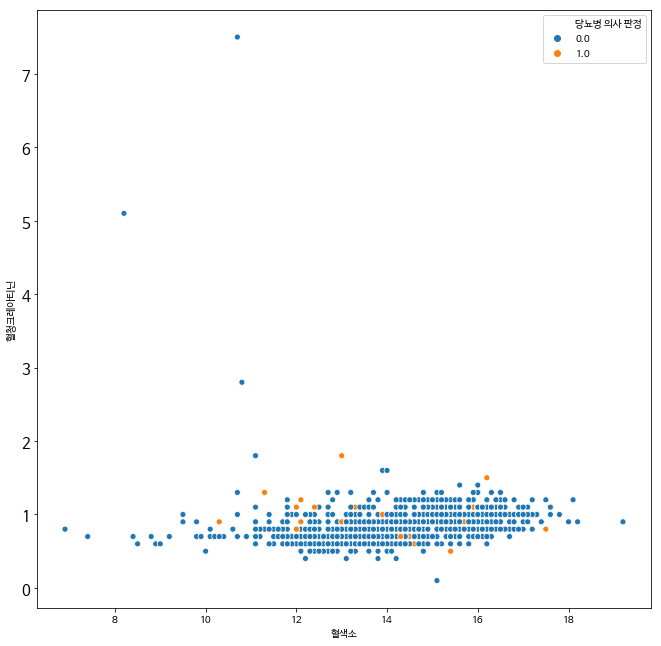

In [15]:
plt.figure(figsize=(11,11))
sns.scatterplot(data=n_sample, x='혈색소', y='혈청크레아티닌', hue='당뇨병 의사 판정')

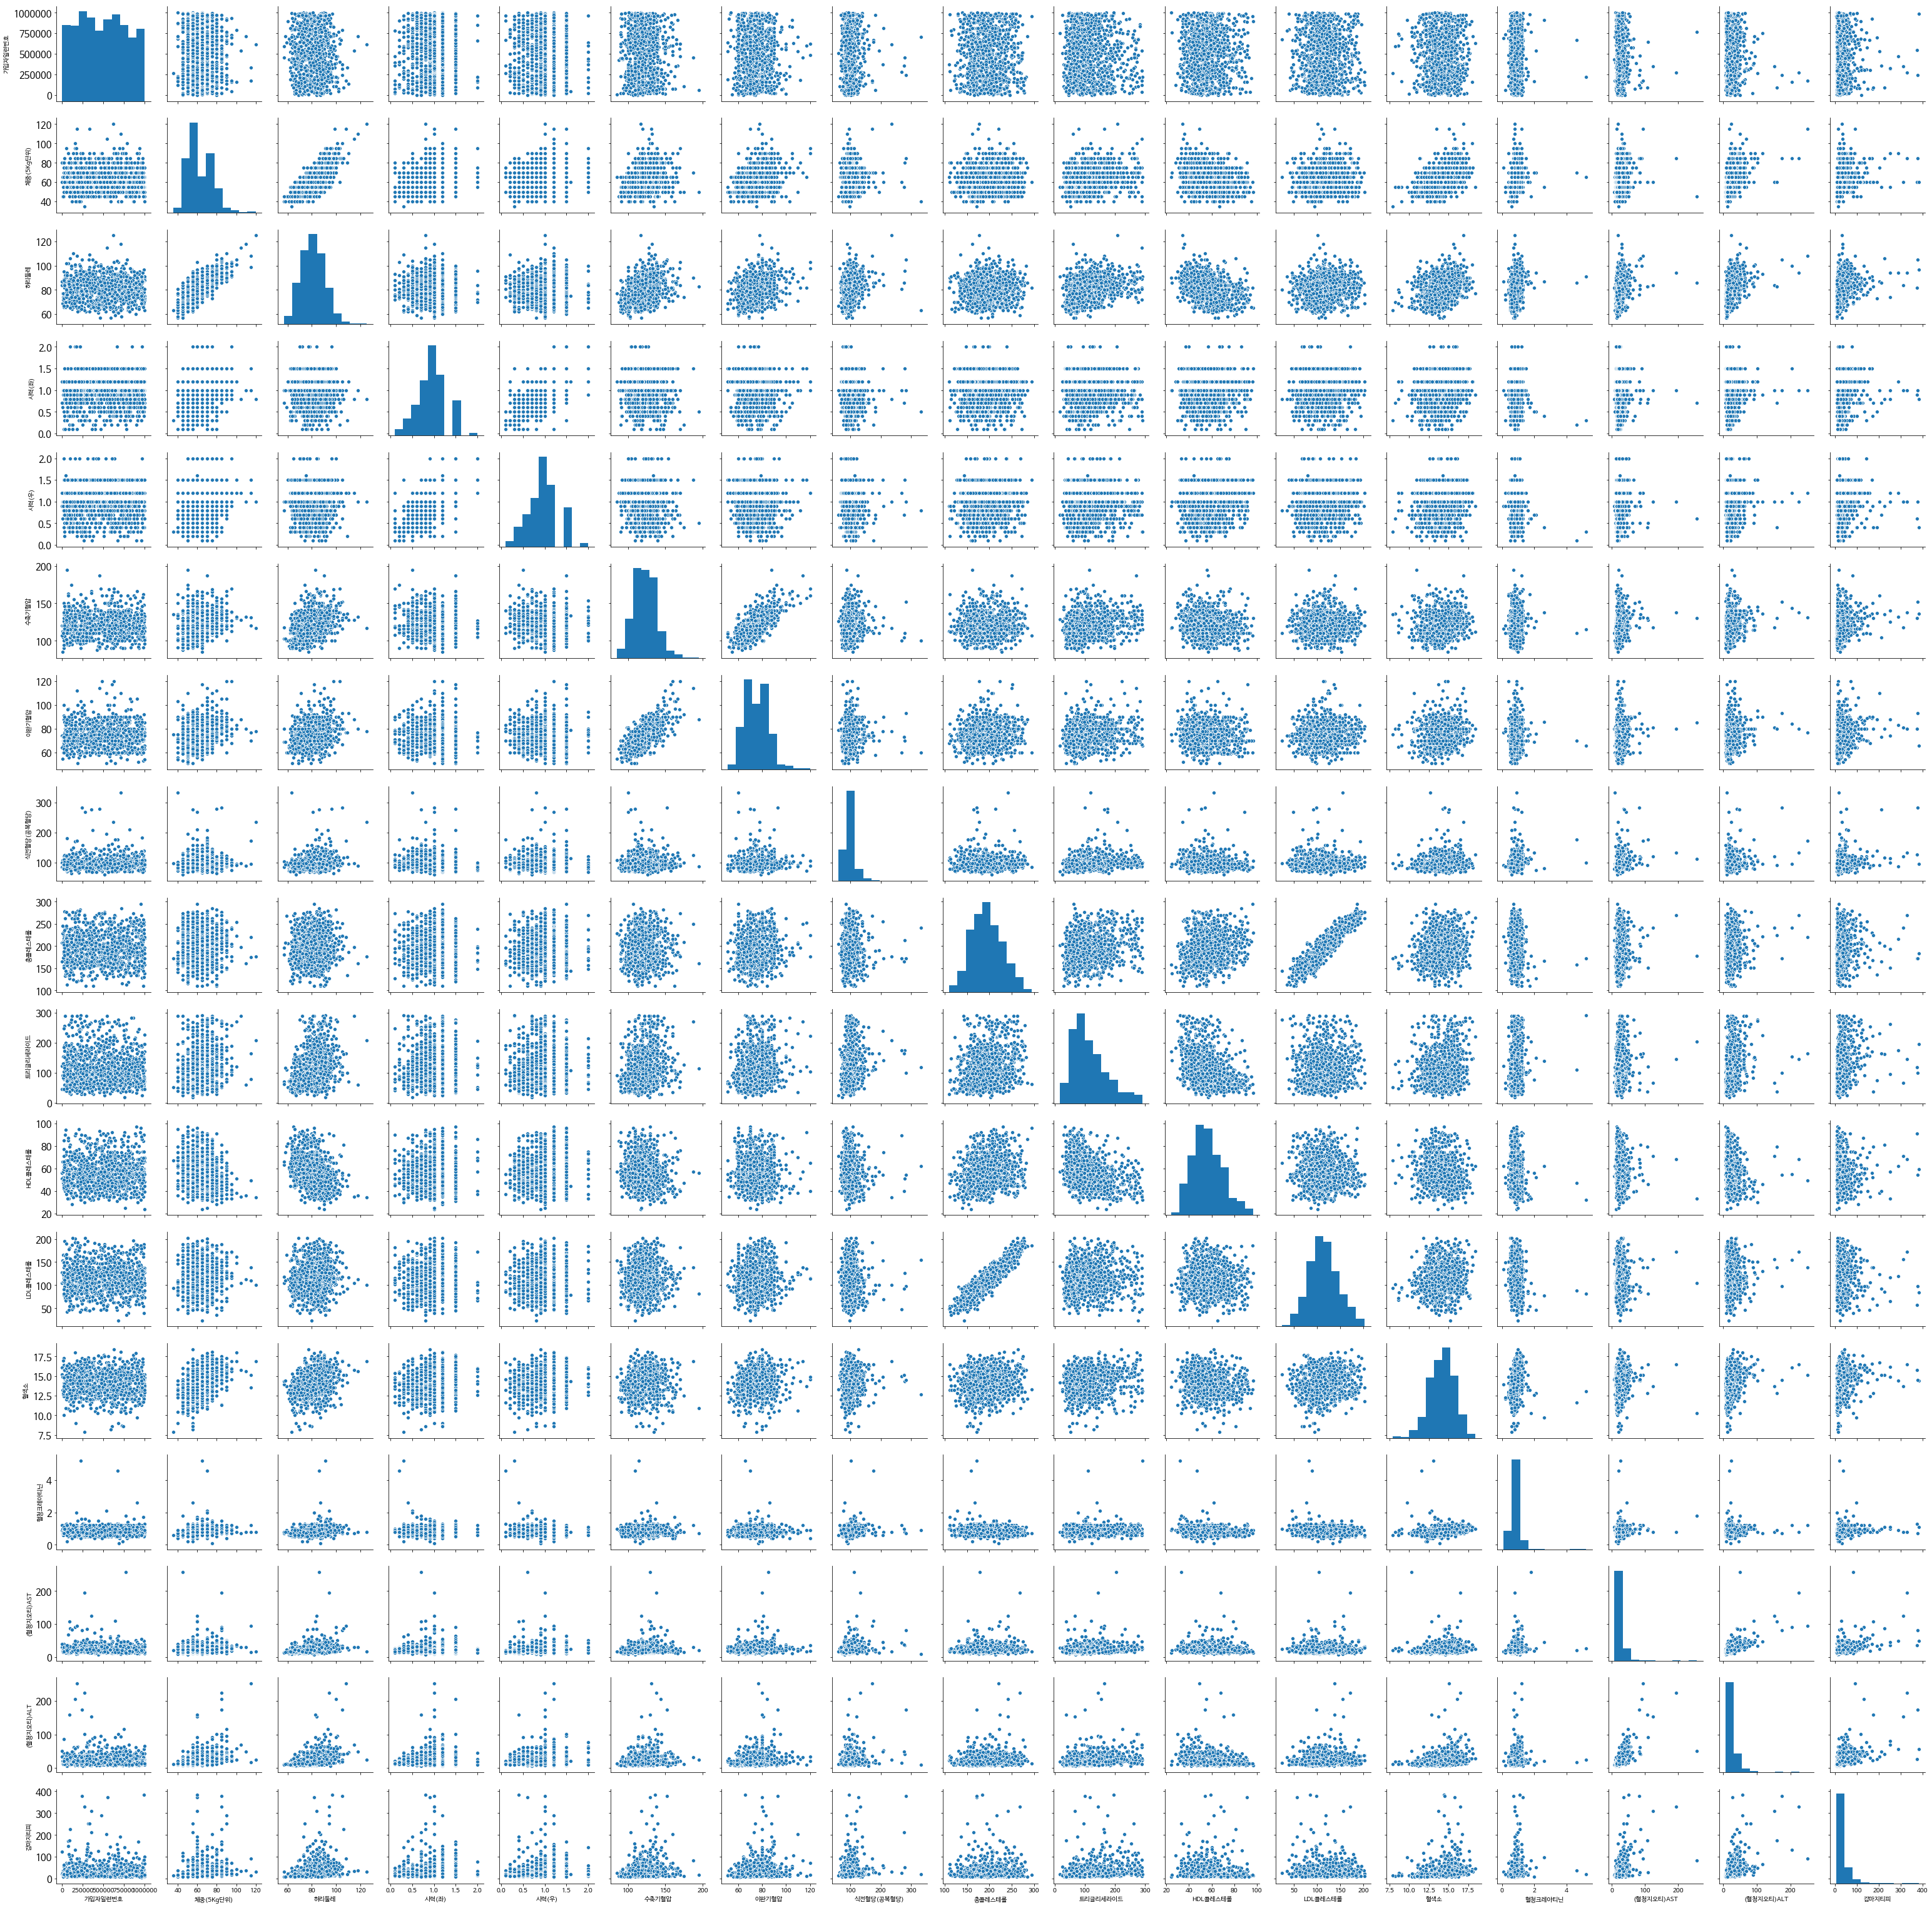

In [42]:
sns.pairplot(n_sample)

In [ ]:
d

# VIF 확인

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
#VIF CHECK
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    data.values, i) for i in range(data.shape[1])]
vif["features"] = data.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

VIF Factor     features
0     1.1131673      알콜성간염여부
1     1.3576631    고혈압 의사 판정
2     1.5103046     간기능 이상여부
3     1.7535006    구강검진 수검여부
4     2.3026610    당뇨병 의사 판정
5     2.3189637        감마지티피
6     3.9923680      가입자일련번호
7     4.1280773      혈청크레아티닌
8     6.8397086   (혈청지오티)ALT
9     7.7072667         흡연상태
10    7.8449436          요단백
11    7.9463325   (혈청지오티)AST
12    8.0105799         시도코드
13   18.5265041         성별코드
14   19.0160410        시력(좌)
15   19.0594285        시력(우)
16   26.9505075  연령대코드(5세단위)
17   44.7909930   식전혈당(공복혈당)
18   51.0432291        청력(좌)
19   52.5113084        청력(우)
20   93.8289245     트리글리세라이드
21  128.8506337    체중(5Kg단위)
22  142.0942196          혈색소
23  144.6092804        이완기혈압
24  187.8595223        수축기혈압
25  263.6499182         허리둘레
26  312.8187621    신장(5Cm단위)
27  473.4611103     HDL콜레스테롤
28 1885.5766864     LDL콜레스테롤
29 5205.8250015       총콜레스테롤

In [71]:
aftvif_var = vif.sort_values(by='VIF Factor',ascending=False)[12:]['features'].values

In [72]:
aftvif_var

array(['식전혈당(공복혈당)', '연령대코드(5세단위)', '시력(우)', '시력(좌)', '성별코드', '시도코드',
       '(혈청지오티)AST', '요단백', '흡연상태', '(혈청지오티)ALT', '혈청크레아티닌', '가입자일련번호',
       '감마지티피', '당뇨병 의사 판정', '구강검진 수검여부', '간기능 이상여부', '고혈압 의사 판정',
       '알콜성간염여부'], dtype=object)

In [73]:
aft_vif=data[aftvif_var]
# aft_vif.to_csv('data_25k_vif.csv', index=False)

In [74]:
aft_vif

식전혈당(공복혈당)  연령대코드(5세단위)     시력(우)     시력(좌)  성별코드  시도코드  (혈청지오티)AST       요단백      흡연상태  (혈청지오티)ALT   혈청크레아티닌  가입자일련번호       감마지티피  당뇨병 의사 판정  구강검진 수검여부  간기능 이상여부  고혈압 의사 판정   알콜성간염여부
0      155.0000000           17 0.5000000 0.5000000     2    45  21.0000000 1.0000000 1.0000000  18.0000000 0.6000000   201061  24.0000000  1.0000000          0 0.0000000  0.0000000 0.0000000
1       89.0000000           12 0.7000000 1.5000000     2    41  15.0000000 1.0000000 3.0000000  14.0000000 0.8000000   586237  18.0000000  0.0000000          0 0.0000000  0.0000000 0.0000000
2       94.0000000            9 1.0000000 1.2000000     2    11  18.0000000 1.0000000 1.0000000  10.0000000 0.7000000   922457  20.0000000  0.0000000          1 0.0000000  0.0000000 0.0000000
3       74.0000000           10 1.2000000 1.2000000     2    11  26.0000000 1.0000000 1.0000000  23.0000000 0.7000000   982201  21.0000000  0.0000000          1 0.0000000  0.0000000 0.0000000
4       90.0000000            5 1.0000000 1.0000000     2    41  34.0000000 1.0000000 1.0000000  34.0000000 0.7000000   750333  24.0000000  0.0000000          1 0.0000000  0.0000000 0.0000000
5       88.0000000            8 0.9000000 1.0000000     2    27  19.0000000 1.0000000 1.0000000   9.0000000 0.8000000   981601  10.0000000  0.0000000          1 0.0000000  0.0000000 1.0000000
6      266.0000000           18 0.5000000 0.5000000     2    27  26.0000000 1.0000000 1.0000000  18.0000000 0.9000000   932701  64.0000000  1.0000000          0 0.0000000  0.0000000 0.0000000
7       81.0000000            6 1.0000000 1.2000000     2    41  19.0000000 1.0000000 1.0000000  10.0000000 0.9000000   596169  14.0000000  0.0000000          0 0.0000000  0.0000000 0.0000000
8       74.0000000            9 0.7000000 0.7000000     2    42  19.0000000 1.0000000 1.0000000   9.0000000 0.8000000   164225  23.0000000  0.0000000          0 0.0000000  0.0000000 1.0000000
9       77.0000000            5 1.5000000 1.5000000     2    44  39.0000000 1.0000000 1.0000000  41.0000000 0.8000000   840797  13.0000000  0.0000000          1 0.0000000  0.0000000 0.0000000
10     101.0000000            6 0.9000000 1.0000000     2    11  26.0000000 1.0000000 1.0000000  17.0000000 0.8000000   419489  21.0000000  0.0000000          0 0.0000000  0.0000000 0.0000000
11      83.0000000            9 0.9000000 0.7000000     2    30  14.0000000 1.0000000 1.0000000  10.0000000 0.7000000    62373  12.0000000  0.0000000          0 0.0000000  0.0000000 0.0000000
12      77.0000000            7 1.2000000 1.5000000     2    11  16.0000000 1.0000000 1.0000000  11.0000000 0.9000000   545441  15.0000000  0.0000000          1 0.0000000  0.0000000 0.0000000
13      75.0000000           11 0.9000000 0.9000000     2    36  43.0000000 1.0000000 1.0000000  26.0000000 0.4000000    52965  18.0000000  0.0000000          0 0.0000000  0.0000000 0.0000000
14      93.0000000            5 0.5000000 0.5000000     2    26  14.0000000 1.0000000 2.0000000   7.0000000 0.6000000   380849  15.0000000  0.0000000          0 0.0000000  0.0000000 0.0000000
15      75.0000000            9 1.2000000 2.0000000     2    11  18.0000000 1.0000000 1.0000000  11.0000000 0.6000000   792897  12.0000000  0.0000000          0 0.0000000  0.0000000 0.0000000
16      95.0000000            5 1.2000000 1.0000000     2    46  13.0000000 1.0000000 1.0000000   8.0000000 0.7000000   340773   9.0000000  0.0000000          1 0.0000000  0.0000000 0.0000000
17      83.0000000            6 1.2000000 0.8000000     2    47  20.0000000 1.0000000 1.0000000  16.0000000 0.6000000   791233  16.0000000  0.0000000          1 0.0000000  0.0000000 0.0000000
18      88.0000000            9 0.4000000 0.4000000     2    44  15.0000000 1.0000000 1.0000000  10.0000000 0.9000000   428217   8.0000000  0.0000000          0 0.0000000  0.0000000 0.0000000
19      85.0000000           14 0.8000000 0.8000000     2    27  24.0000000 1.0000000 1.0000000  16.0000000 0.5000000     3269  19.0000000  0.0000000          0 0.00000

In [ ]:

In [ ]:
￼
1


# 상관 관계 보기

In [43]:
corr_data = data.corr()

In [64]:
corr_data[abs(corr_data['당뇨병 의사 판정']) > 0.1]['당뇨병 의사 판정'].sort_values(ascending=False)

당뇨병 의사 판정     1.0000000
식전혈당(공복혈당)    0.7298046
연령대코드(5세단위)   0.1654108
허리둘레          0.1524971
트리글리세라이드      0.1254863
수축기혈압         0.1222118
감마지티피         0.1192364
Name: 당뇨병 의사 판정, dtype: float64

# Decision Tree 로 나무 그리기

In [17]:
import os
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [22]:
x = data.drop(['당뇨병 의사 판정','식전혈당(공복혈당)'], axis = 1)
y = data['당뇨병 의사 판정']
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                   test_size=0.3, random_state=42)

In [36]:
X_train.columns.tolist()

['가입자일련번호',
 '성별코드',
 '연령대코드(5세단위)',
 '시도코드',
 '신장(5Cm단위)',
 '체중(5Kg단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마지티피',
 '흡연상태',
 '구강검진 수검여부',
 '고혈압 의사 판정',
 '간기능 이상여부',
 '알콜성간염여부']

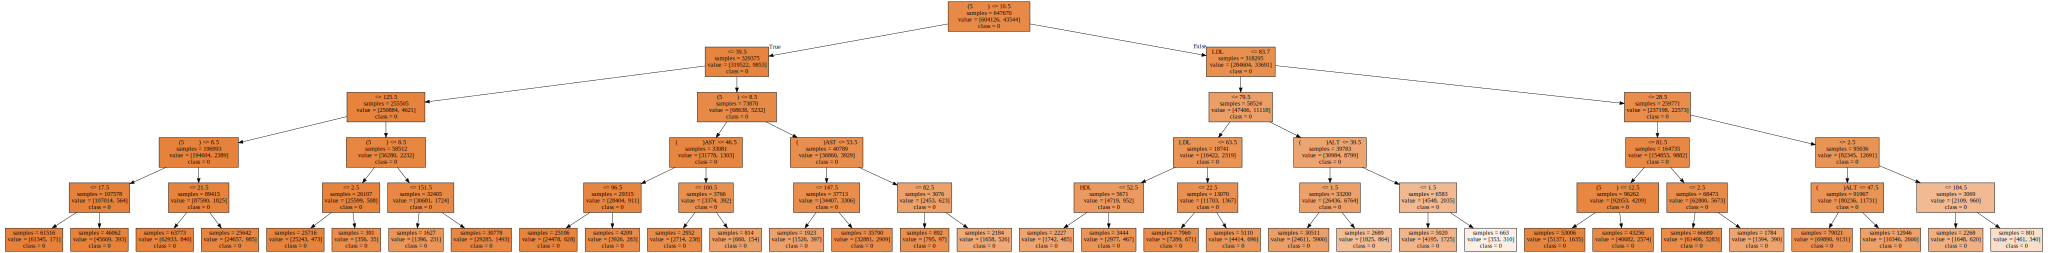

In [24]:
# 새로운 트리 모델 생성 (min_sample_leaf = 200인 트리모델)
tree = DecisionTreeClassifier(criterion = 'gini', max_depth=5, min_samples_leaf=10, random_state=1234)
tree = tree.fit(X_train, y_train)

#tree3.dot으로 결과 저장
export_graphviz(tree, out_file="tree3.dot", class_names = ['0', '1'],
               feature_names = X_train.columns, impurity=False, filled=True)

#tree3.dot 그리기
with open('tree3.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [25]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
ds_feature_importance = pd.DataFrame()
ds_feature_importance["Feature"] = X_train.columns
ds_feature_importance["Importance"] = tree.feature_importances_
#ds_feature_importance의 테이블을 중요도별로 정렬
ds_feature_importance=ds_feature_importance.sort_values("Importance", ascending=False)
ds_feature_importance.round(3)

Feature  Importance
2   연령대코드(5세단위)   0.3760000
16     LDL콜레스테롤   0.1890000
22        감마지티피   0.1830000
6          허리둘레   0.0750000
18          요단백   0.0710000
21   (혈청지오티)ALT   0.0510000
20   (혈청지오티)AST   0.0200000
14     트리글리세라이드   0.0160000
13       총콜레스테롤   0.0150000
15     HDL콜레스테롤   0.0030000
26     간기능 이상여부   0.0000000
25    고혈압 의사 판정   0.0000000
24    구강검진 수검여부   0.0000000
23         흡연상태   0.0000000
19      혈청크레아티닌   0.0000000
17          혈색소   0.0000000
0       가입자일련번호   0.0000000
1          성별코드   0.0000000
12        이완기혈압   0.0000000
11        수축기혈압   0.0000000
10        청력(우)   0.0000000
9         청력(좌)   0.0000000
8         시력(우)   0.0000000
7         시력(좌)   0.0000000
5     체중(5Kg단위)   0.0000000
4     신장(5Cm단위)   0.0000000
3          시도코드   0.0000000
27      알콜성간염여부   0.0000000

In [75]:
from sklearn.metrics import f1_score, classification_report

In [30]:
y_pred = tree.predict(X_test)

In [34]:
set(y_test) - set(y_pred)

{1.0}

In [35]:
f1_score(y_pred, y_test,labels=np.unique(y_pred))

/home/pirl/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


0.0

In [77]:
print(r)
print('\n clasification report:\n',classification_report(y_pred, y_test))


 clasification report:
               precision    recall  f1-score   support

         0.0       1.00      0.93      0.97    277573
         1.0       0.00      0.00      0.00         0

   micro avg       0.93      0.93      0.93    277573
   macro avg       0.50      0.47      0.48    277573
weighted avg       1.00      0.93      0.97    277573



/home/pirl/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/pirl/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/pirl/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# 모델링 

# 목표 변수는 '당뇨병 의사 판정'

In [ ]:
cols_category = []
cols_numeric = []
for i in data.columns.tolist():
    if data[i].nunique() < 10 :
        cols_category.append(i)
    else :
        cols_numeric.append(i)

In [ ]:
print(cols_category,'\n\n')
print('cols_category:', len(cols_category),'\n\n')
print('')
print(cols_numeric,'\n\n')
print('cols_numeric:',len(cols_numeric))

In [ ]:
data.columns.tolist()

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
cols_list = ['성별코드',
 '연령대코드(5세단위)',
 '신장(5Cm단위)',
 '체중(5Kg단위)',
In [45]:
￼
from sklearn.metrics import f1_score
y_pred = lgb.predict(X_test)
f1_score(y_pred, y_test)
x.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925243 entries, 0 to 925242
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '당뇨병 의사 판정',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마지티피',
 '흡연상태',
 '구강검진 수검여부',
 ]

In [ ]:
go_data = data[cols_list]

In [ ]:
x = go_data.drop(['당뇨병 의사 판정',], axis = 1)
y = go_data['당뇨병 의사 판정']
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                   test_size=0.3, random_state=42)

lgb = LGBMClassifier(n_jobs=-1)
lgb.fit(X_train, y_train)

In [ ]:
# 새로운 트리 모델 생성 (min_sample_leaf = 200인 트리모델)
tree = DecisionTreeClassifier(criterion = 'gini', max_depth=5, min_samples_leaf=10, random_state=1234)
tree = tree.fit(X_train, y_train)

#tree3.dot으로 결과 저장
export_graphviz(tree, out_file="tree3.dot", class_names = ['0', '1'],
               feature_names = X_train.columns, impurity=False, filled=True)

#tree3.dot 그리기
with open('tree3.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))from sklearn.metrics import f1_score
y_pred = lgb.predict(X_test)
f1_score(y_pred, y_test)

In [ ]:
x.info()

# 간 수치 예측

In [117]:
data_gan = data_raw_
In [ ]:
￼
1
.copy()

In [118]:
x_gan = data_gan.drop('간기능 이상여부', axis=1)
y_gan = data_gan['간기능 이상여부']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(x_gan, y_gan,
                                                   test_size=0.3, random_state=42)

In [120]:
# 새로운 트리 모델 생성 (min_sample_leaf = 200인 트리모델)
tree = DecisionTreeClassifier(criterion = 'gini',random_state=42)
tree = tree.fit(X_train, y_train)

#tree3.dot으로 결과 저장
export_graphviz(tree, out_file="tree3.dot", class_names = ['0', '1'],
               feature_names = X_train.columns, impurity=False, filled=True)


In [121]:
y_pred = tree.predict(X_test)
print("Decision Tree(default) Result with vital few")
print('accuracy:',accuracy_score(y_pred, y_test))
print('f1_score:', f1_score(y_pred, y_test))

Decision Tree(default) Result with vital few
accuracy: 1.0
f1_score: 1.0


In [122]:
x_gan = data_gan.drop(['간기능 이상여부','(혈청지오티)AST','(혈청지오티)ALT'] , axis=1)
y_gan = data_gan['간기능 이상여부']

X_train, X_test, y_train, y_test = train_test_split(x_gan, y_gan,
                                                   test_size=0.3, random_state=42)

# 새로운 트리 모델 생성 (min_sample_leaf = 200인 트리모델)
tree = DecisionTreeClassifier(criterion = 'gini',random_state=42)
tree = tree.fit(X_train, y_train)

#tree3.dot으로 결과 저장
export_graphviz(tree, out_file="tree3.dot", class_names = ['0', '1'],
               feature_names = X_train.columns, impurity=False, filled=True)
y_pred = tree.predict(X_test)
print("Decision Tree(default) Result w/o vital few")
print('accuracy:',accuracy_score(y_pred, y_test))
print('f1_score:', f1_score(y_pred, y_test))

Decision Tree(default) Result w/o vital few
accuracy: 0.9459925857342033
f1_score: 0.2762516294114807


# 고혈압 ㄲ

In [100]:
data_blood = data_raw.copy()

In [106]:
x_blood = data_blood.drop('고혈압 의사 판정', axis=1)
y_blood = data_blood['고혈압 의사 판정']


X_train, X_test, y_train, y_test = train_test_split(x_blood, y_blood,
                                                   test_size=0.3, random_state=42)

# 새로운 트리 모델 생성 (min_sample_leaf = 200인 트리모델)
tree = DecisionTreeClassifier(criterion = 'gini',random_state=42)
tree = tree.fit(X_train, y_train)

export_graphviz(tree, out_file="tree3.dot", class_names = ['0', '1'],
               feature_names = X_train.columns, impurity=False, filled=True)

y_pred = tree.predict(X_test)
print("Decision Tree(default) Result with vital few")
print('accuracy:',accuracy_score(y_pred, y_test))
print('f1_score:', f1_score(y_pred, y_test))

Decision Tree(default) Result with vital few
accuracy: 1.0
f1_score: 1.0


In [107]:
x_blood = data_blood.drop(['고혈압 의사 판정','수축기혈압','이완기혈압'], axis=1)
y_blood = data_blood['고혈압 의사 판정']

In [ ]:
￼
1


X_train, X_test, y_train, y_test = train_test_split(x_blood, y_blood,
                                                   test_size=0.3, random_state=42)

# 새로운 트리 모델 생성 (min_sample_leaf = 200인 트리모델)
tree = DecisionTreeClassifier(criterion = 'gini',random_state=42)
tree = tree.fit(X_train, y_train)

export_graphviz(tree, out_file="tree3.dot", class_names = ['0', '1'],
               feature_names = X_train.columns, impurity=False, filled=True)

y_pred = tree.predict(X_test)
print("Decision Tree(default) Result w/o vital few")
print('accuracy:',accuracy_score(y_pred, y_test))
print('f1_score:', f1_score(y_pred, y_test))

Decision Tree(default) Result w/o vital few
accuracy: 0.9170056165405137
f1_score: 0.08134944371336285


# 당뇨병 예측

In [111]:
data_sugar = data_raw.copy()

x_sugar = data_sugar.drop('당뇨병 의사 판정', axis=1)
y_sugar = data_sugar['당뇨병 의사 판정']


X_train, X_test, y_train, y_test = train_test_split(x_sugar, y_sugar,
                                                   test_size=0.3, random_state=42)

# 새로운 트리 모델 생성 (min_sample_leaf = 200인 트리모델)
tree = DecisionTreeClassifier(criterion = 'gini',random_state=42)
tree = tree.fit(X_train, y_train)

export_graphviz(tree, out_file="tree3.dot", class_names = ['0', '1'],
               feature_names = X_train.columns, impurity=False, filled=True)

y_pred = tree.predict(X_test)
print("Decision Tree(default) Result with vital few")
print('accuracy:',accuracy_score(y_pred, y_test))
print('f1_score:', f1_score(y_pred, y_test))

Decision Tree(default) Result with vital few
accuracy: 1.0
f1_score: 1.0


In [112]:
data_sugar = data_raw.copy()

x_sugar = data_sugar.drop(['당뇨병 의사 판정','식전혈당(공복혈당)'], axis=1)
y_sugar = data_sugar['당뇨병 의사 판정']


X_train, X_test, y_train, y_test = train_test_split(x_sugar, y_sugar,
                                                   test_size=0.3, random_state=42)

# 새로운 트리 모델 생성 (min_sample_leaf = 200인 트리모델)
tree = DecisionTreeClassifier(criterion = 'gini',random_state=42)
tree = tree.fit(X_train, y_train)

export_graphviz(tree, out_file="tree3.dot", class_names = ['0', '1'],
               feature_names = X_train.columns, impurity=False, filled=True)

y_pred = tree.predict(X_test)
print("Decision Tree(default) Result w/o vital few")
print('accuracy:',accuracy_score(y_pred, y_test))
print('f1_score:', f1_score(y_pred, y_test))

Decision Tree(default) Result w/o vital few
accuracy: 0.8792786041870067
f1_score: 0.17422804899085734


In [113]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[240529,  15103],
       [ 18406,   3535]])

In [123]:
a = 240529
b = 15103
c = 18406
d = 3535
pre = c/(a+c)
re = b/(a+b)
f1 = 2*pre*re/(pre+re)
f1

0.03595985531204466

# 알콜간감염여부

In [124]:
data_alchol = data_raw.copy()

x_alchol = data_alchol.drop(['알콜성간염여부'], axis=1)
y_alchol = data_alchol['알콜성간염여부']


X_train, X_test, y_train, y_test = train_test_split(x_alchol, y_alchol,
                                                   test_size=0.3, random_state=42)

# 새로운 트리 모델 생성 (min_sample_leaf = 200인 트리모델)
tree = DecisionTreeClassifier(criterion = 'gini',random_state=42)
tree = tree.fit(X_train, y_train)

export_graphviz(tree, out_file="tree3.dot", class_names = ['0', '1'],
               feature_names = X_train.columns, impurity=False, filled=True)

y_pred = tree.predict(X_test)
print("Decision Tree(default) Result with vital few")
print('accuracy:',accuracy_score(y_pred, y_test))
print('f1_score:', f1_score(y_pred, y_test))

Decision Tree(default) Result w/o vital few
accuracy: 0.999830675173738
f1_score: 0.9978693503785303


In [140]:
data_alchol = data_raw.copy()

x_alchol = data_alchol.drop(['알콜성간염여부','(혈청지오티)AST','(혈청지오티)ALT'], axis=1)
y_alchol = data_alchol['알콜성간염여부']


X_train, X_test, y_train, y_test = train_test_split(x_alchol, y_alchol,
                                                   test_size=0.3, random_state=42)

# 새로운 트리 모델 생성 (min_sample_leaf = 200인 트리모델)
tree = DecisionTreeClassifier(criterion = 'gini',random_state=42)
tree = tree.fit(X_train, y_train)

export_graphviz(tree, out_file="tree3.dot", class_names = ['0', '1'],
               feature_names = X_train.columns, impurity=False, filled=True)

y_pred = tree.predict(X_test)
print("Decision Tree(default) Result w/o vital few")
print('accuracy:',accuracy_score(y_pred, y_test))
print('f1_score:', f1_score(y_pred, y_test))

Decision Tree(default) Result w/o vital few
accuracy: 0.9164039730089022
f1_score: 0.08624084429392768


In [145]:
data_alchol['AST/ALT'] = data_alchol['(혈청지오티)AST'] / data_alchol['(혈청지오티)ALT']

In [146]:
# data_alchol = data_raw.copy()

x_alchol = data_alchol.drop(['알콜성간염여부'], axis=1)
y_alchol = data_alchol['알콜성간염여부']

X_train, X_test, y_train, y_test = train_test_split(x_alchol, y_alchol,
                                                   test_size=0.3, random_state=42)

# 새로운 트리 모델 생성 (min_sample_leaf = 200인 트리모델)
tree = DecisionTreeClassifier(criterion = 'gini',random_state=42)
tree = tree.fit(X_train, y_train)

export_graphviz(tree, out_file="tree3.dot", class_names = ['0', '1'],
               feature_names = X_train.columns, impurity=False, filled=True)

y_pred = tree.predict(X_test)
print("Decision Tree(default) Result w/o vital few")
print('accuracy:',accuracy_score(y_pred, y_test))
print('f1_score:', f1_score(y_pred, y_test))

Decision Tree(default) Result w/o vital few
accuracy: 1.0
f1_score: 1.0


In [147]:
confusion_matrix(y_pred, y_test)

array([[266553,      0],
       [     0,  11020]])

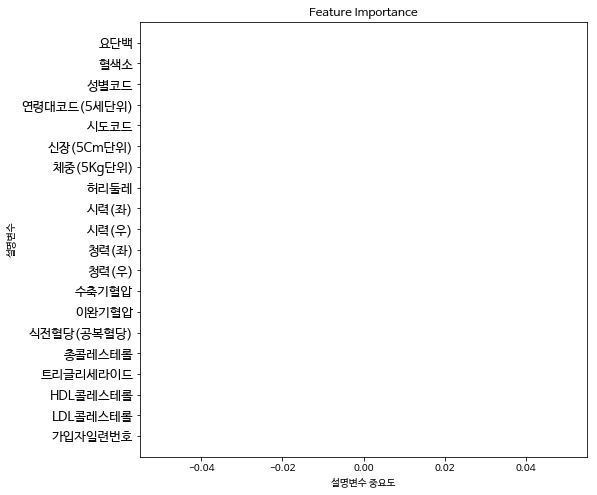

In [138]:
# 설명 변수 중요도 그래프 함수 실행
plt.figure(figsize=(8,8))
cols = X_train.columns
importances = tree.feature_importances_
indices = np.argsort(tree.feature_importances_[:20])

plt.barh(range(len(indices)), importances[indices], align="center", color='khaki')

plt.yticks(range(len(indices)), [cols[i] for i in indices], size=13)
plt.xlabel("설명변수 중요도")
plt.ylabel('설명변수')
plt.ylim(-1, 20)
plt.title("Feature Importance")
ten_importance_feature = tree.feature_importances_[:21]

# 당뇨병과 혈압으로 간기능 이상여부 예측?

In [153]:
data_gan2 = data_raw.copy()
data_gan2.columns
data_gan2

가입자일련번호  성별코드  연령대코드(5세단위)  시도코드   신장(5Cm단위)   체중(5Kg단위)        허리둘레     시력(좌)     시력(우)     청력(좌)     청력(우)       수축기혈압       이완기혈압  식전혈당(공복혈당)      총콜레스테롤    트리글리세라이드   HDL콜레스테롤    LDL콜레스테롤        혈색소       요단백   혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT       감마지티피      흡연상태  구강검진 수검여부  당뇨병 의사 판정  고혈압 의사 판정  간기능 이상여부   알콜성간염여부
0        201061     2           17    45 150.0000000 135.0000000  51.0000000 0.5000000 0.5000000 1.0000000 1.0000000 110.0000000  65.0000000 155.0000000 101.0000000  81.0000000 54.0000000  30.0000000 11.3000000 1.0000000 0.6000000  21.0000000  18.0000000  24.0000000 1.0000000          0  1.0000000  0.0000000 0.0000000 0.0000000
1        586237     2           12    41 145.0000000  35.0000000  51.0000000 1.5000000 0.7000000 1.0000000 1.0000000  94.0000000  64.0000000  89.0000000 188.0000000  71.0000000 66.0000000 108.0000000 11.5000000 1.0000000 0.8000000  15.0000000  14.0000000  18.0000000 3.0000000          0  0.0000000  0.0000000 0.0000000 0.0000000
2        922457     2            9    11 150.0000000  35.0000000  51.0000000 1.2000000 1.0000000 1.0000000 1.0000000 110.0000000  70.0000000  94.0000000 211.0000000  87.0000000 87.0000000 107.0000000 13.3000000 1.0000000 0.7000000  18.0000000  10.0000000  20.0000000 1.0000000          1  0.0000000  0.0000000 0.0000000 0.0000000
3        982201     2           10    11 150.0000000  35.0000000  52.0000000 1.2000000 1.2000000 1.0000000 1.0000000  95.0000000  62.0000000  74.0000000 165.0000000  53.0000000 80.0000000  74.0000000 13.2000000 1.0000000 0.7000000  26.0000000  23.0000000  21.0000000 1.0000000          1  0.0000000  0.0000000 0.0000000 0.0000000
4        750333     2            5    41 160.0000000  40.0000000  52.0000000 1.0000000 1.0000000 1.0000000 1.0000000  90.0000000  60.0000000  90.0000000 185.0000000  46.0000000 71.0000000 105.0000000 13.6000000 1.0000000 0.7000000  34.0000000  34.0000000  24.0000000 1.0000000          1  0.0000000  0.0000000 0.0000000 0.0000000
5        981601     2            8    27 155.0000000  45.0000000  52.0000000 1.0000000 0.9000000 1.0000000 1.0000000  98.0000000  60.0000000  88.0000000 227.0000000  45.0000000 79.0000000 139.0000000 13.6000000 1.0000000 0.8000000  19.0000000   9.0000000  10.0000000 1.0000000          1  0.0000000  0.0000000 0.0000000 1.0000000
6        932701     2           18    27 140.0000000  30.0000000  53.0000000 0.5000000 0.5000000 2.0000000 2.0000000 120.0000000  70.0000000 266.0000000 190.0000000  86.0000000 63.0000000 109.0000000  9.6000000 1.0000000 0.9000000  26.0000000  18.0000000  64.0000000 1.0000000          0  1.0000000  0.0000000 0.0000000 0.0000000
7        596169     2            6    41 155.0000000  35.0000000  53.0000000 1.2000000 1.0000000 1.0000000 1.0000000 109.0000000  67.0000000  81.0000000 157.0000000  48.0000000 74.0000000  73.0000000 12.9000000 1.0000000 0.9000000  19.0000000  10.0000000  14.0000000 1.0000000          0  0.0000000  0.0000000 0.0000000 0.0000000
8        164225     2            9    42 155.0000000  40.0000000  53.0000000 0.7000000 0.7000000 1.0000000 1.0000000 109.0000000  77.0000000  74.0000000 184.0000000  47.0000000 59.0000000 115.0000000 13.7000000 1.0000000 0.8000000  19.0000000   9.0000000  23.0000000 1.0000000          0  0.0000000  0.0000000 0.0000000 1.0000000
9        840797     2            5    44 155.0000000  40.0000000  53.0000000 1.5000000 1.5000000 1.0000000 1.0000000 101.0000000  72.0000000  77.0000000 160.0000000  74.0000000 59.0000000  86.0000000 13.6000000 1.0000000 0.8000000  39.0000000  41.0000000  13.0000000 1.0000000          1  0.0000000  0.0000000 0.0000000 0.0000000
10       419489     2            6    11 150.0000000  45.0000000  53.0000000 1.0000000 0.9000000 1.0000000 1.0000000 107.0000000  75.0000000 101.0000000 169.0000000 111.0000000 60.0000000  86.0000000  9.7000000 1.0000000 0.8000000  26.0000000  17.0000000  21.0000000 1.0000000          0  0.0000000  0.0000000 0.0000000 0.0000000
11        62373     2            9    30 160.000

In [157]:
x_gan2 = data_gan2.drop(['간기능 이상여부','총콜레스테롤',
                         '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
                         '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST',
                         '(혈청지오티)ALT', '감마지티피','가입자일련번호'], axis=1)
y_gan2 = data_gan2['간기능 이상여부']


X_train, X_test, y_train, y_test = train_test_split(x_gan2, y_gan2,
                                                   test_size=0.3, random_state=42)

# 새로운 트리 모델 생성 (min_sample_leaf = 200인 트리모델)
tree = DecisionTreeClassifier(criterion = 'gini',)
tree = tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
print("Decision Tree(default) Result with vital few")
print('accuracy:',accuracy_score(y_pred, y_test))
print('f1_score:', f1_score(y_pred, y_test))

Decision Tree(default) Result with vital few
accuracy: 0.9247873532368062
f1_score: 0.088937377263801


In [158]:
x_gan2.columns

Index(['성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '흡연상태', '구강검진 수검여부', '당뇨병 의사 판정', '고혈압 의사 판정', '알콜성간염여부'], dtype='object')

In [159]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
ds_feature_importance = pd.DataFrame()
ds_feature_importance["Feature"] = X_train.columns
ds_feature_importance["Importance"] = tree.feature_importances_
#ds_feature_importance의 테이블을 중요도별로 정렬
ds_feature_importance=ds_feature_importance.sort_values("Importance", ascending=False)
ds_feature_importance.round(3)

Feature  Importance
12   식전혈당(공복혈당)   0.1400000
10        수축기혈압   0.1270000
11        이완기혈압   0.1090000
5          허리둘레   0.1040000
2          시도코드   0.0950000
7         시력(우)   0.0830000
6         시력(좌)   0.0790000
1   연령대코드(5세단위)   0.0730000
4     체중(5Kg단위)   0.0600000
3     신장(5Cm단위)   0.0520000
13         흡연상태   0.0300000
14    구강검진 수검여부   0.0240000
8         청력(좌)   0.0060000
0          성별코드   0.0060000
9         청력(우)   0.0050000
17      알콜성간염여부   0.0030000
16    고혈압 의사 판정   0.0030000
15    당뇨병 의사 판정   0.0010000